# Anchor NGLY1 symptoms into hetnet (through DIS-SYM edge)

#### NGLY1 symptoms links to diseases in hetnet can be found:
- data integration with the most current (curated/text mining) datasets (current knowledge structured in DBs)
- text/data mining the literature

## DIS-SYM datasets
- Barabasi (HSDN)
- Orphanet
- HPO project
- Rob Hoehndorf
- Tudor Groza
- Monarch (not yet)

In [1]:
import pandas as pd
from matplotlib_venn import venn2, venn2_unweighted, venn3, venn3_unweighted
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
# data path
path = '/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/ngly1/data/'

## NGLY1 SYMPTOMS

### MESH

In [3]:
# load manually curated mesh symptoms
ngly1_sym_mesh_df = pd.read_table('{}manual-curation/ngly1-mesh.tsv'.format(path), header=None)
ngly1_sym_mesh_df.columns = ['mesh_code', 'mesh_term']
ngly1_sym_mesh_df.head(2)

,mesh_code,mesh_term
0,MESH:D009123,Muscle Hypotonia
1,MESH:C562827,Alacrima


In [4]:
# Number of terms mapped to mesh
ngly1_sym_mesh_list = ngly1_sym_mesh_df.mesh_code.unique()
print('NGLY1 deficiency symptoms (MESH): {}'.format(len(ngly1_sym_mesh_list)))

NGLY1 deficiency symptoms (MESH): 15


### HP

In [5]:
# load hp sym
ngly1_sym_hp_df = pd.read_table('{}manual-curation/ngly1-hp.tsv'.format(path), header=None)
ngly1_sym_hp_df.columns = ['hp_code', 'hp_term']
ngly1_sym_hp_df.head(2)

,hp_code,hp_term
0,HP:0001263,Global developmental delay
1,HP:0001252,Muscular hypotonia


In [6]:
# Number of terms mapped to mesh
ngly1_sym_hp_list = ngly1_sym_hp_df.hp_code.unique()
print('NGLY1 deficiency symptoms (HP): {}'.format(len(ngly1_sym_hp_list)))

NGLY1 deficiency symptoms (HP): 28


## LOAD DISEASE-SYMPTOM EDGES

In [7]:
# hetnet v1.0
# source: Symptom edges from hetionet v1.0 [https://github.com/dhimmel/integrate/blob/master/integrate.ipynb]
commit = '60d611892bf387b5b23c5f2e2e3bc472cfce85f3'
url = 'https://raw.githubusercontent.com/dhimmel/medline/' + commit + '/data/disease-symptom-cooccurrence.tsv'
hetionet_df = pd.read_table(url)
hetionet_df.head(2)
hetionet_df['mesh_id'] = 'MESH:' + hetionet_df['mesh_id'].astype(str)
hetionet_df.head(2)

,doid_code,doid_name,mesh_id,mesh_name,cooccurrence,expected,enrichment,odds_ratio,p_fisher
0,DOID:10652,Alzheimer's disease,MESH:D004314,Down Syndrome,800,35.619601,22.459544,39.918352,0.0
1,DOID:10652,Alzheimer's disease,MESH:D008569,Memory Disorders,1593,76.580532,20.801631,41.885877,0.0


In [8]:
# HSDN - Barabasi 2014
# source: https://github.com/LABrueggs/HSDN
# The supplementary data released by Zhou et al. (HSDN - barabasi) identifies diseases and symptoms 
# by their MeSH names, but does not include the associated MeSH IDs. 
# To ease interoperability we have performed the minor task of appending the relevant MeSH IDs to these files. 
# read HSDN supplement that was mapped to MESH
url = 'https://raw.githubusercontent.com/LABrueggs/HSDN/master/Combined-Output.tsv'
hsdn_df = pd.read_table(url)
hsdn_df = hsdn_df.rename(columns={
    'MeSH Symptom Term' : 'symptom_term',
    'MeSH Disease Term' : 'disease_term',
    'PubMed occurrence' : 'cooccurs', 
    'TFIDF score' : 'tfidf_score',
    'MeSH Disease ID' : 'disease_meshid',
    'MeSH Symptom ID' : 'symptom_meshid'
                    })
hsdn_df.head(2)
hsdn_df['disease_meshid'] = 'MESH:' + hsdn_df['disease_meshid'].astype(str)
hsdn_df['symptom_meshid'] = 'MESH:' + hsdn_df['symptom_meshid'].astype(str)
hsdn_df.head(2)

,Unnamed: 0,symptom_term,disease_term,cooccurs,tfidf_score,disease_meshid,symptom_meshid
0,0,"Aging, Premature",Respiratory Syncytial Virus Infections,1,3.464551,MESH:D018357,MESH:D019588
1,1,"Aging, Premature",Orthomyxoviridae Infections,1,3.464551,MESH:D009976,MESH:D019588


In [9]:
# Orphanet 2016
# Source url: http://www.orphadata.org/cgi-bin/inc/product4.inc.php
# Source file: /home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data-JAN2016/en_product4_HPO.xml
# Provenance: /home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data-JAN2016/orphanet-data-provenance.txt
# Parser: /home/nuria/workspace/utils3/hetionet/orphanet.py::orphadata_xml_parser
orphanet_df = pd.read_table('/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data-JAN2016/orphanet-disease-symptom.tsv')
orphanet_df.head(2)

,orphanet_code,orphanet_term,hp_code,hp_term
0,Orphanet:79430,Hermansky-Pudlak syndrome,HP:0000083,Renal insufficiency
1,Orphanet:79430,Hermansky-Pudlak syndrome,HP:0000421,Epistaxis


In [10]:
# HPO phenotype annotation 2017 (not used in this analysis: 2017 HPO update and diseases not DO normalized)
# Source: http://compbio.charite.de/jenkins/job/hpo.annotations/lastStableBuild/artifact/misc/phenotype_annotation.tab
# Provenance: 2017-01-23 20:45
hpo17_df = pd.read_table('http://compbio.charite.de/jenkins/job/hpo.annotations/lastStableBuild/artifact/misc/phenotype_annotation.tab')
hpo17_df.head(2)
hpo17_df.columns = ['db', 'disease_id', 'db_term', 'qualifier', 'hp_id', 'db_ref', 'evidence', 'onset', 'frequency', 'with', 'aspect', 'synonym', 'date', 'assigned_by' ]
hpo17_df.head(2)
hpo17_df['disease_id'] = hpo17_df['db'] + ':' + hpo17_df['disease_id'].astype(str)
hpo17_df.tail(2)

,db,disease_id,db_term,qualifier,hp_id,db_ref,evidence,onset,frequency,with,aspect,synonym,date,assigned_by
128821,ORPHA,ORPHA:99978,Klatskin tumor,NaN,HP:0012378,ORPHA:99978,TAS,NaN,HP:0040283,NaN,O,NaN,2017.03.09,orphadata
128822,ORPHA,ORPHA:99978,Klatskin tumor,NaN,HP:0030153,ORPHA:99978,TAS,NaN,HP:0040281,NaN,O,NaN,2017.03.09,orphadata


In [11]:
# HPO phenotype annotation 2016 NORMALIZED (2016 HPO and DO normalized)
# Source: IBI Lab
# Provenance: 2016-01-13 13:18
# Read DisPhe associations (DO/HP) ID normalized, obsolete included
data = '/home/nuria/IbiLab/MedBioinformatics/trait-based-diseasome-2015/data/out/hpCuratedDP-refined.tab'
hpo_df = pd.read_table(data, sep='\t', names=['do_id','hp_id'])
hpo_df.head(2)

,do_id,hp_id
0,DOID:1440,HP:0000006
1,DOID:1440,HP:0000508


In [12]:
# Robert Hoehndorf 2015
# Source: http://aber-owl.net/aber-owl/diseasephenotypes/
# Paper: https://www.ncbi.nlm.nih.gov/pubmed/26051359
#url = 'http://aber-owl.net/aber-owl/diseasephenotypes/data/disease_phenotypes.doa'
#rh_df = pd.read_table(url, sep='\t', names=['DB', 'do_id', 'Object_Symbol', 'Qualifier_score', 'hp_id', 'Reference', 'Evidence_Code', 'empty', 'Aspect', 'DB_Object_Name', 'DB_Object_Synonym', 'DB_Object_Type', 'Taxon', 'Date', 'Assigned_By', 'Annotation_Extension', 'Gene_Product_Form_ID'])
#rh_df.drop(rh_df.index[[0]], inplace=True)
#rh_df.head(2)

In [13]:
# Robert Hoehndorf 2015 NORMALIZED
# Source: http://aber-owl.net/aber-owl/diseasephenotypes/
# Paper: https://www.ncbi.nlm.nih.gov/pubmed/26051359
#url = '/home/nuria/IbiLab/MedBioinformatics/trait-based-diseasome-2015/data/out/disease_phenotypes_doid_hpid_refined.doa'
#rh_df = pd.read_table(url, sep='\t', names=['DB', 'do_id', 'Object_Symbol', 'Qualifier_score', 'hp_id', 'Reference', 'Evidence_Code', 'empty', 'Aspect', 'DB_Object_Name', 'DB_Object_Synonym', 'DB_Object_Type', 'Taxon', 'Date', 'Assigned_By', 'Annotation_Extension', 'Gene_Product_Form_ID'])
#rh_df.drop(rh_df.index[[0]], inplace=True)
# Read DisPhe associations (DO/HP) ID normalized, obsolete included, without MP phenotypes
data = '/home/nuria/IbiLab/MedBioinformatics/trait-based-diseasome-2015/data/out/aberOwlTMDPWithoutMP-refined.tab'
rh_df = pd.read_table(data, sep='\t', names=['do_id','hp_id'])
rh_df.head(2)

,do_id,hp_id
0,DOID:0060262,HP:0005264
1,DOID:0060262,HP:0001082


In [14]:
# Tudor Groza 2015 
# Source: Not accessible at http://pubmed-browser.human-phenotype-ontology.org/ 
# Paper: https://www.ncbi.nlm.nih.gov/pubmed/26119816
# Tudor Groza 2015 NORMALIZED <= Source: IBI Lab
# Read DisPhe associations (DO/HP) ID normalized, obsolete included
data = '/home/nuria/IbiLab/MedBioinformatics/trait-based-diseasome-2015/data/out/hpTMDP-refined.tab'
tg_df = pd.read_table(data, sep='\t', names=['do_id','hp_id'])
tg_df.head(2)

,do_id,hp_id
0,DOID:11512,HP:0002639
1,DOID:11512,HP:0001541


## SYMPTOMS OVERLAPS: NGLY1 - hetnet - datasets
What dataset covers more ngly1 sym? 
- Text mining datasets (8/15 symptoms (MESH)) [HPO mappings]
- AberOWL dataset (10/15); HPO-Curated (9/15) (MESH) [HPO+UMLS inferred mappings]
- AberOWL dataset (27/28); HPO-Curated (26/28) (HPO) [HPO mappings] also [HPO+UMLS inferred mappings]

Coverage of NGLY1 symptoms with data integration:
- 10/15 (MESH) [HPO mappings]
- 12/15; (5<=hetnet, 7<=other) (MESH) [HPO+UMLS inferred mappings]
- 27/28 (5<=hetnet, 22<=other) (HPO) [HPO mappings] also [HPO+UMLS inferred mappings]

##### Conclusion: Using HPO 2016 + UMLS 2016 inferred mappings we increase NGLY1 symptom recall  (above all from HPO text mined terms)
##### Note: List of hetnet sym comes from the dis-sym edge dataset in the integrated network

### MESH

In [15]:
# load mesh symptoms
# hetnet: from Dis-Sym edges

In [16]:
## validation of mesh symptoms list
## Inconsistent: 438 SYM nodes in hetionet (from MESH classification branch) - 426 SYM with link to disease
# source: Symptoms nodes from hetionet v1.0 [https://github.com/dhimmel/integrate/blob/master/integrate.ipynb]
commit = 'a7036a37302973b15ab949aab4056d9bc062910e'
#url = rawgit('dhimmel', 'mesh', commit, 'data/symptoms.tsv')
url = 'https://raw.githubusercontent.com/dhimmel/mesh/' + commit + '/data/symptoms.tsv'
symptom_df1 = pd.read_table(url)
symptom_df1.head(2)
#len(symptom_df1.mesh_id.unique()) # 438

,mesh_id,mesh_name,in_hsdn
0,D000006,"Abdomen, Acute",1
1,D000270,Adie Syndrome,0


In [17]:
# source: input of mesh symptoms in nb disease-symptom data mining 
# [https://nbviewer.ipython.org/github/dhimmel/medline/blob/61590a7007d282429694e52a3a6743af99c1ab12/symptoms.ipynb]
url = url = 'https://raw.githubusercontent.com/dhimmel/mesh/e561301360e6de2140dedeaa7c7e17ce4714eb7f/data/symptoms.tsv'
symptom_df2 = pd.read_table(url)
symptom_df2.head(2)
#len(symptom_df2.mesh_id.unique()) # 438

,mesh_id,mesh_name,in_hsdn
0,D000006,"Abdomen, Acute",1
1,D000270,Adie Syndrome,0


In [18]:
# mesh symptoms are in the mesh repo
# source: github/dhimmel, mesh repo, data folder (no commit appears)
url = 'https://raw.githubusercontent.com/dhimmel/mesh/gh-pages/data/symptoms.tsv'
symptom_df3 = pd.read_table(url)
symptom_df3.head(2)
#len(symptom_df3.mesh_id.unique()) # 438

,mesh_id,mesh_name,in_hsdn
0,D000006,"Abdomen, Acute",1
1,D000270,Adie Syndrome,0


In [19]:
# downloaded file from mesh repo in the daniel's github, i think..
symptom_df4 = pd.read_table("data/hetionet-symptoms.tsv")
symptom_df4.head(2)
#len(symptom_df4.mesh_id.unique()) # 438

,mesh_id,mesh_name,in_hsdn
0,D000006,"Abdomen, Acute",1
1,D000270,Adie Syndrome,0


In [20]:
# source: output disease-symptoms cooccurrences in nb disease-symptom data mining 
# [https://nbviewer.ipython.org/github/dhimmel/medline/blob/61590a7007d282429694e52a3a6743af99c1ab12/symptoms.ipynb]
url = 'https://raw.githubusercontent.com/dhimmel/medline/gh-pages/data/disease-symptom-cooccurrence.tsv'
symptom_df5 = pd.read_table(url)
symptom_df5.head(2)
#len(symptom_df5.mesh_id.unique()) # 426

,doid_code,doid_name,mesh_id,mesh_name,cooccurrence,expected,enrichment,odds_ratio,p_fisher
0,DOID:10652,Alzheimer's disease,D004314,Down Syndrome,800,35.619601,22.459544,39.918352,0.0
1,DOID:10652,Alzheimer's disease,D008569,Memory Disorders,1593,76.580532,20.801631,41.885877,0.0


In [21]:
# source: Symptom edges from hetionet v1.0 [https://github.com/dhimmel/integrate/blob/master/integrate.ipynb]
commit = '60d611892bf387b5b23c5f2e2e3bc472cfce85f3'
# url = rawgit('dhimmel', 'medline', commit, 'data/disease-symptom-cooccurrence.tsv')
url = 'https://raw.githubusercontent.com/dhimmel/medline/' + commit + '/data/disease-symptom-cooccurrence.tsv'
symptom_df6 = pd.read_table(url)
symptom_df6.head(2)
#len(symptom_df6.mesh_id.unique()) # 426

,doid_code,doid_name,mesh_id,mesh_name,cooccurrence,expected,enrichment,odds_ratio,p_fisher
0,DOID:10652,Alzheimer's disease,D004314,Down Syndrome,800,35.619601,22.459544,39.918352,0.0
1,DOID:10652,Alzheimer's disease,D008569,Memory Disorders,1593,76.580532,20.801631,41.885877,0.0


In [22]:
rest = ( set(list(symptom_df1.mesh_id)) - set(list(symptom_df2.mesh_id)) )
print('1-2: {}'.format(len(rest)))
rest = ( set(list(symptom_df1.mesh_id)) - set(list(symptom_df3.mesh_id)) )
print('1-3: {}'.format(len(rest)))
rest = ( set(list(symptom_df1.mesh_id)) - set(list(symptom_df6.mesh_id)) )
print('1-6: {}'.format(len(rest)))
print('1-6: {}'.format(rest))
rest = list(rest)
rest_d = {'mesh_id' : rest}
rest_df = pd.DataFrame.from_dict(data=rest_d)
rest_df = pd.merge(rest_df,symptom_df1, on='mesh_id')
print('These are the 12 symptom nodes without edges:')
rest_df
# Conclusion: Symptom nodes (438) in hetionet, symptom nodes involved in disease-symptom edges (426). 
## end of validation ##

1-2: 0
1-3: 0
1-6: 12
1-6: {'D056124', 'D066190', 'D018489', 'D057768', 'D065906', 'D059245', 'D012818', 'D001832', 'D020924', 'D020879', 'D059388', 'D012817'}
These are the 12 symptom nodes without edges:


,mesh_id,mesh_name,in_hsdn
0,D056124,Slit Ventricle Syndrome,1
1,D066190,Allesthesia,0
2,D018489,Space Motion Sickness,1
3,D057768,Infantile Apparent Life-Threatening Event,1
4,D065906,Hyperlactatemia,0
5,D059245,Transient Tachypnea of the Newborn,0
6,D012818,"Signs and Symptoms, Respiratory",0
7,D001832,Body Temperature Changes,0
8,D020924,Urological Manifestations,0
9,D020879,Neuromuscular Manifestations,0


In [23]:
# Note: the ngly1 sym 'hyperlactemia' is in hetionet but without a link to a disease

In [24]:
# Coverage ngly1 - hetionet - Other datasets
# Load HP2MESH mappings from HP ontology
hpo_mappings = pd.read_table("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data-JAN2016/hp-hp2mesh-mappings.tsv".format(path))
hpo_mappings.head(2)

,hp_code,hp_term,mesh_code
0,HP:0200042,Skin ulcer,MESH:D012883
1,HP:0000873,Diabetes insipidus,MESH:D003919


In [25]:
# mappings
orphanet_mesh_df = pd.merge(orphanet_df,hpo_mappings, on='hp_code')
hpo_mesh_df = pd.merge(hpo_df,hpo_mappings, left_on='hp_id', right_on='hp_code')
rh_mesh_df = pd.merge(rh_df,hpo_mappings, left_on='hp_id', right_on='hp_code')
tg_mesh_df = pd.merge(tg_df,hpo_mappings, left_on='hp_id', right_on='hp_code')

NGLY1 deficiency symptoms (MESH): 15
Hetionet symptoms (MESH): 426
HSDN symptoms (MESH): 322
Orphanet symptoms (MESH): 808
HPO Curated symptoms (MESH): 851
HPO Text mining symptoms (MESH): 930
AberOWL symptoms (MESH): 1020


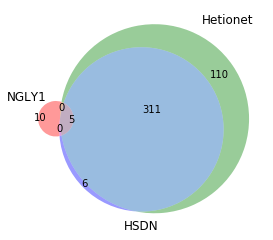

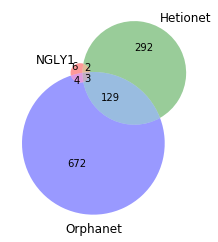

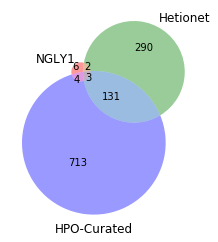

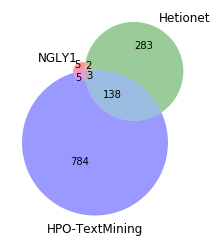

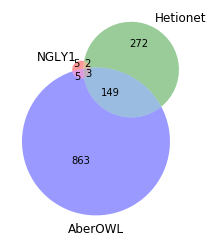

In [26]:
# Load mesh symptoms
# Number of NGLY1 terms mapped to mesh
ngly1_sym_mesh_list = ngly1_sym_mesh_df.mesh_code.unique()
print('NGLY1 deficiency symptoms (MESH): {}'.format(len(ngly1_sym_mesh_list)))
# Number of hetionet symptom terms 
hetionet_sym_mesh_list = hetionet_df.mesh_id.unique()
print('Hetionet symptoms (MESH): {}'.format(len(hetionet_sym_mesh_list)))
# Number of hsdn - barabasi symptom terms
hsdn_sym_mesh_list = hsdn_df.symptom_meshid.unique()
print('HSDN symptoms (MESH): {}'.format(len(hsdn_sym_mesh_list)))
# Number of orphanet symptom terms
orpha_sym_mesh_list = orphanet_mesh_df.mesh_code.unique()
print('Orphanet symptoms (MESH): {}'.format(len(orpha_sym_mesh_list)))
# Number of HPO Curated symptom terms
hpo_sym_mesh_list = hpo_mesh_df.mesh_code.unique()
print('HPO Curated symptoms (MESH): {}'.format(len(hpo_sym_mesh_list)))
# Number of HPO Text mining symptom terms
tg_sym_mesh_list = tg_mesh_df.mesh_code.unique()
print('HPO Text mining symptoms (MESH): {}'.format(len(tg_sym_mesh_list)))
# Number of AberOWL symptom terms
rh_sym_mesh_list = rh_mesh_df.mesh_code.unique()
print('AberOWL symptoms (MESH): {}'.format(len(rh_sym_mesh_list)))
# Coverage HSDN
ngly1 = set(ngly1_sym_mesh_list)
hetionet = set(hetionet_sym_mesh_list)
hsdn = set(hsdn_sym_mesh_list)
#venn3_unweighted([ngly1,hetionet,hsdn],('NGLY1', 'Hetionet', 'HSDN'))
#plt.show()
venn3([ngly1,hetionet,hsdn],('NGLY1', 'Hetionet', 'HSDN'))
plt.show()
# Coverage Orphanet
orphanet = set(orpha_sym_mesh_list)
venn3([ngly1,hetionet,orphanet],('NGLY1', 'Hetionet', 'Orphanet'))
plt.show()
# Coverage HPO Phenotype Annotation 2016
ngly1 = set(ngly1_sym_mesh_list)
hetionet = set(hetionet_sym_mesh_list)
hpo = set(hpo_sym_mesh_list)
venn3([ngly1,hetionet,hpo],('NGLY1', 'Hetionet', 'HPO-Curated'))
plt.show()
# Coverage HPO Text Mining 2015 (TGroza)
ngly1 = set(ngly1_sym_mesh_list)
hetionet = set(hetionet_sym_mesh_list)
hpotm = set(tg_sym_mesh_list)
venn3([ngly1,hetionet,hpotm],('NGLY1', 'Hetionet', 'HPO-TextMining'))
plt.show()
# Coverage AberOWL 2015 (RHoehndorf)
ngly1 = set(ngly1_sym_mesh_list)
hetionet = set(hetionet_sym_mesh_list)
aberowl = set(rh_sym_mesh_list)
venn3([ngly1,hetionet,aberowl],('NGLY1', 'Hetionet', 'AberOWL'))
plt.show()

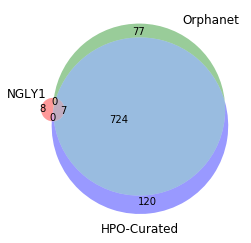

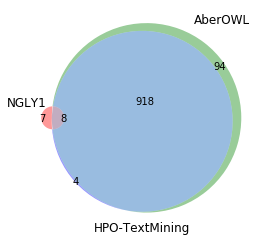

In [27]:
# Conclusion: All five datasets have NGLY1 symptoms.
# Overlap between sources
# Curated
venn3([ngly1,orphanet,hpo], ('NGLY1', 'Orphanet', 'HPO-Curated'))
plt.show()
# Text mined 
venn3([ngly1,aberowl,hpotm], ('NGLY1', 'AberOWL', 'HPO-TextMining'))
plt.show()

In [28]:
# Data integration: How many NGLY1 symptoms we will recover
intersection_mesh = (ngly1 & (hsdn | orphanet | hpo | aberowl | hpotm))
not_mapped_mesh = (ngly1 - intersection_mesh)
print('Number of NGLY1 symptoms (MESH) uncovered with data integration: {}/{}'.format(len(intersection_mesh),len(ngly1_sym_mesh_list)))
print('Number of NGLY1 symptoms (MESH) not covered with data integration: {}/{}'.format(len(not_mapped_mesh),len(ngly1_sym_mesh_list)))
print('NGLY1 symptoms (MESH) not covered with data integration:')
not_mapped_dict = {'mesh_code' : list(not_mapped_mesh)}
not_mapped_mesh_df = pd.DataFrame.from_dict(data=not_mapped_dict)
not_mapped_terms_df = pd.merge(not_mapped_mesh_df,ngly1_sym_mesh_df, on='mesh_code')
not_mapped_terms_df

Number of NGLY1 symptoms (MESH) uncovered with data integration: 10/15
Number of NGLY1 symptoms (MESH) not covered with data integration: 5/15
NGLY1 symptoms (MESH) not covered with data integration:


,mesh_code,mesh_term
0,MESH:D005317,IUGR (intrauterine growth restriction)
1,MESH:D065906,Hyperlactatemia
2,MESH:D007567,Neonatal Jaundice
3,MESH:D003320,Corneal Ulcer
4,MESH:C562827,Alacrima


In [29]:
# NOTE: ALACRIMA not recovered!!! BUT, it is in DO-HPO datasets. Problem -HPO 2016- lacks some HPO-MESH xrefs 
# that are inferred using UMLS. Extract NGLY1 MESH symptoms without HPO and contact HPO.

In [30]:
# NLGY symptoms potentially anchor by data integration
mapped_dict = {'mesh_code' : list(intersection_mesh)}
mapped_mesh_df = pd.DataFrame.from_dict(data=mapped_dict)
mapped_terms_df = pd.merge(mapped_mesh_df,ngly1_sym_mesh_df, on='mesh_code')
print('NGLY1 symptoms (MESH) covered with data integration:')
mapped_terms_df

NGLY1 symptoms (MESH) covered with data integration:


,mesh_code,mesh_term
0,MESH:D009123,Muscle Hypotonia
1,MESH:D012021,Abnormal Deep Tendon Reflex
2,MESH:D013285,Strabismus
3,MESH:D001072,Apraxias
4,MESH:D008831,Microcephaly
5,MESH:D008103,Liver Fibrosis
6,MESH:D012640,Seizures
7,MESH:D012600,Scoliosis
8,MESH:D003248,Constipation
9,MESH:D017043,Chalazions


In [31]:
# check 5 MESH sym in hetnet
ngly1_hetnet = (ngly1 & hetionet)
print('NGLY1 symptoms (MESH) in hetnet: {}'.format(ngly1_hetnet))

NGLY1 symptoms (MESH) in hetnet: {'MESH:D012640', 'MESH:D003248', 'MESH:D012021', 'MESH:D001072', 'MESH:D009123'}


#### HPO + UMLS inferred mappings
Use these mappings to recall important symptoms in MESH as ALACRIMA

In [32]:
# add mappings inferred through UMLS
# load hp2mesh inferred mappings from UMLS
umls_mappings = pd.read_table("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data-JAN2016/umls2016aa-hp2mesh-mappings.tsv".format(path))
umls_mappings['mesh_code'] = 'MESH:' + umls_mappings['mesh_code'].astype(str)
umls_mappings.head(2)

,hp_code,hp_term,mesh_code,mesh_term
0,HP:0009037,Segmental spinal muscular atrophy,MESH:C566670,"Spinal Muscular Atrophy, Segmental"
1,HP:0100620,Germinoma,MESH:D018237,Germinomas


In [33]:
# concatenate hpo and umls hp2mesh mappings
hpo_mappings.head(2)
merge_df = pd.merge(hpo_mappings,umls_mappings, how='outer', on=['hp_code', 'mesh_code'])
concat_df = pd.concat([hpo_mappings,umls_mappings]).groupby(['hp_code', 'mesh_code'])
merge_df.shape #(1454, 5)
len(concat_df) # 1454, the same result but the type of object is different
type(concat_df)
# merge is cleaner with full outer join (union of keys from both appended dataframes)
hpo_umls_mappings = pd.merge(hpo_mappings,umls_mappings, how='outer', on=['hp_code', 'mesh_code'])

In [34]:
# mappings
orphanet_mesh_df = pd.merge(orphanet_df,hpo_umls_mappings, on='hp_code')
hpo_mesh_df = pd.merge(hpo_df,hpo_umls_mappings, left_on='hp_id', right_on='hp_code')
rh_mesh_df = pd.merge(rh_df,hpo_umls_mappings, left_on='hp_id', right_on='hp_code')
tg_mesh_df = pd.merge(tg_df,hpo_umls_mappings, left_on='hp_id', right_on='hp_code')

NGLY1 deficiency symptoms (MESH): 15
Hetionet symptoms (MESH): 426
HSDN symptoms (MESH): 322
Orphanet symptoms (MESH): 1004
HPO Curated symptoms (MESH): 1085
HPO Text mining symptoms (MESH): 1172
AberOWL symptoms (MESH): 1349


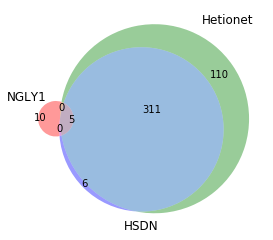

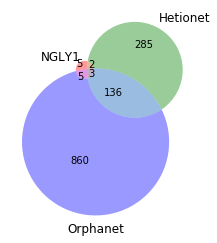

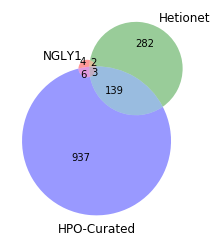

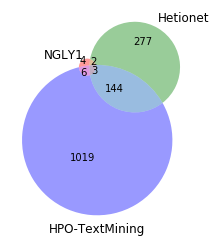

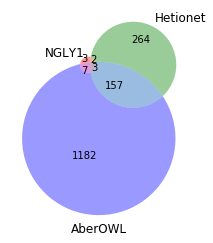

In [35]:
# Load mesh symptoms
# Number of NGLY1 terms mapped to mesh
ngly1_sym_mesh_list = ngly1_sym_mesh_df.mesh_code.unique()
print('NGLY1 deficiency symptoms (MESH): {}'.format(len(ngly1_sym_mesh_list)))
# Number of hetionet symptom terms 
hetionet_sym_mesh_list = hetionet_df.mesh_id.unique()
print('Hetionet symptoms (MESH): {}'.format(len(hetionet_sym_mesh_list)))
# Number of hsdn - barabasi symptom terms
hsdn_sym_mesh_list = hsdn_df.symptom_meshid.unique()
print('HSDN symptoms (MESH): {}'.format(len(hsdn_sym_mesh_list)))
# Number of orphanet symptom terms
orpha_sym_mesh_list = orphanet_mesh_df.mesh_code.unique()
print('Orphanet symptoms (MESH): {}'.format(len(orpha_sym_mesh_list)))
# Number of HPO Curated symptom terms
hpo_sym_mesh_list = hpo_mesh_df.mesh_code.unique()
print('HPO Curated symptoms (MESH): {}'.format(len(hpo_sym_mesh_list)))
# Number of HPO Text mining symptom terms
tg_sym_mesh_list = tg_mesh_df.mesh_code.unique()
print('HPO Text mining symptoms (MESH): {}'.format(len(tg_sym_mesh_list)))
# Number of AberOWL symptom terms
rh_sym_mesh_list = rh_mesh_df.mesh_code.unique()
print('AberOWL symptoms (MESH): {}'.format(len(rh_sym_mesh_list)))
# Coverage HSDN
ngly1 = set(ngly1_sym_mesh_list)
hetionet = set(hetionet_sym_mesh_list)
hsdn = set(hsdn_sym_mesh_list)
#venn3_unweighted([ngly1,hetionet,hsdn],('NGLY1', 'Hetionet', 'HSDN'))
#plt.show()
venn3([ngly1,hetionet,hsdn],('NGLY1', 'Hetionet', 'HSDN'))
plt.show()
# Coverage Orphanet
orphanet = set(orpha_sym_mesh_list)
venn3([ngly1,hetionet,orphanet],('NGLY1', 'Hetionet', 'Orphanet'))
plt.show()
# Coverage HPO Phenotype Annotation 2016
ngly1 = set(ngly1_sym_mesh_list)
hetionet = set(hetionet_sym_mesh_list)
hpo = set(hpo_sym_mesh_list)
venn3([ngly1,hetionet,hpo],('NGLY1', 'Hetionet', 'HPO-Curated'))
plt.show()
# Coverage HPO Text Mining 2015 (TGroza)
ngly1 = set(ngly1_sym_mesh_list)
hetionet = set(hetionet_sym_mesh_list)
hpotm = set(tg_sym_mesh_list)
venn3([ngly1,hetionet,hpotm],('NGLY1', 'Hetionet', 'HPO-TextMining'))
plt.show()
# Coverage AberOWL 2015 (RHoehndorf)
ngly1 = set(ngly1_sym_mesh_list)
hetionet = set(hetionet_sym_mesh_list)
aberowl = set(rh_sym_mesh_list)
venn3([ngly1,hetionet,aberowl],('NGLY1', 'Hetionet', 'AberOWL'))
plt.show()

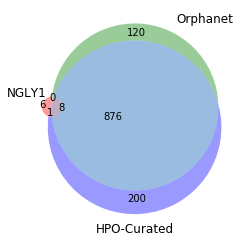

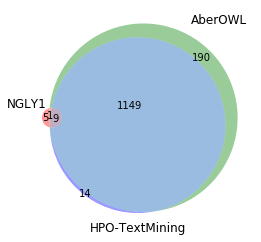

In [36]:
# Conclusion: All five datasets have NGLY1 symptoms. 
# Overlap between sources
# Curated
venn3([ngly1,orphanet,hpo], ('NGLY1', 'Orphanet', 'HPO-Curated'))
plt.show()
# Text mined 
venn3([ngly1,aberowl,hpotm], ('NGLY1', 'AberOWL', 'HPO-TextMining'))
plt.show()

In [37]:
# Data integration: How many NGLY1 symptoms we will recover
intersection_mesh = (ngly1 & (hsdn | orphanet | hpo | aberowl | hpotm))
not_mapped_mesh = (ngly1 - intersection_mesh)
print('Number of NGLY1 symptoms (MESH) uncovered with data integration: {}/{}'.format(len(intersection_mesh),len(ngly1_sym_mesh_list)))
print('Number of NGLY1 symptoms (MESH) not covered with data integration: {}/{}'.format(len(not_mapped_mesh),len(ngly1_sym_mesh_list)))
print('NGLY1 symptoms (MESH) not covered with data integration:')
not_mapped_dict = {'mesh_code' : list(not_mapped_mesh)}
not_mapped_mesh_df = pd.DataFrame.from_dict(data=not_mapped_dict)
not_mapped_terms_df = pd.merge(not_mapped_mesh_df,ngly1_sym_mesh_df, on='mesh_code')
ngly1_not_mapped_terms_df = not_mapped_terms_df
not_mapped_terms_df

Number of NGLY1 symptoms (MESH) uncovered with data integration: 12/15
Number of NGLY1 symptoms (MESH) not covered with data integration: 3/15
NGLY1 symptoms (MESH) not covered with data integration:


,mesh_code,mesh_term
0,MESH:D065906,Hyperlactatemia
1,MESH:D007567,Neonatal Jaundice
2,MESH:D005317,IUGR (intrauterine growth restriction)


In [38]:
# NLGY symptoms anchor by data integration
mapped_dict = {'mesh_code' : list(intersection_mesh)}
mapped_mesh_df = pd.DataFrame.from_dict(data=mapped_dict)
mapped_terms_df = pd.merge(mapped_mesh_df,ngly1_sym_mesh_df, on='mesh_code')
print('NGLY1 symptoms (MESH) covered with data integration:')
mapped_terms_df

NGLY1 symptoms (MESH) covered with data integration:


,mesh_code,mesh_term
0,MESH:D009123,Muscle Hypotonia
1,MESH:D012021,Abnormal Deep Tendon Reflex
2,MESH:D013285,Strabismus
3,MESH:D001072,Apraxias
4,MESH:D008831,Microcephaly
5,MESH:D008103,Liver Fibrosis
6,MESH:C562827,Alacrima
7,MESH:D012640,Seizures
8,MESH:D012600,Scoliosis
9,MESH:D003248,Constipation


In [39]:
# Conclusion: Using HPO 2016 + UMLS 2016 inferred mappings we increase NGLY1 symptom recall 
# (above all from HPO text mined terms)

In [40]:
# check 5 MESH sym in hetnet
ngly1_hetnet = (ngly1 & hetionet)
print('NGLY1 symptoms (MESH) in hetnet: {}'.format(ngly1_hetnet))

NGLY1 symptoms (MESH) in hetnet: {'MESH:D012640', 'MESH:D003248', 'MESH:D012021', 'MESH:D001072', 'MESH:D009123'}


### HP

NGLY1 deficiency symptoms (HP): 28
Hetionet symptoms (HP): 167
HSDN symptoms (HP): 149
Orphanet symptoms (HP): 4014
HPO Curated symptoms (HP): 5135
HPO Text mining symptoms (HP): 4206
AberOWL symptoms (HP): 5969


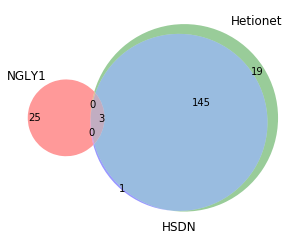

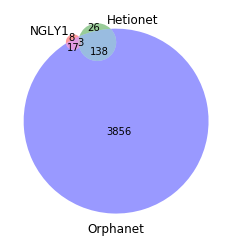

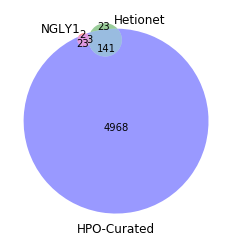

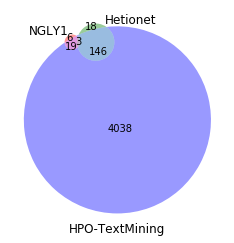

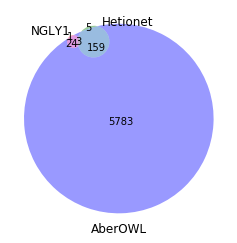

In [41]:
# Coverage ngly1 - hetionet - HSDN
# Load hp symptoms
# Number of NGLY1 terms mapped to hp
ngly1_sym_hp_list = ngly1_sym_hp_df.hp_code.unique()
print('NGLY1 deficiency symptoms (HP): {}'.format(len(ngly1_sym_hp_list)))
# Number of hetionet symptom terms 
hetionet_sym_hp_df = hetionet_df.merge(hpo_umls_mappings, left_on='mesh_id', right_on='mesh_code')
hetionet_sym_hp_list = hetionet_sym_hp_df.hp_code.unique()
print('Hetionet symptoms (HP): {}'.format(len(hetionet_sym_hp_list)))
# Number of hsdn - barabasi symptom terms
hsdn_sym_hp_df = hsdn_df.merge(hpo_umls_mappings, left_on='symptom_meshid', right_on='mesh_code')
hsdn_sym_hp_list = hsdn_sym_hp_df.hp_code.unique()
print('HSDN symptoms (HP): {}'.format(len(hsdn_sym_hp_list)))
# Number of orphanet symptom terms
orpha_sym_hp_list = orphanet_df.hp_code.unique()
print('Orphanet symptoms (HP): {}'.format(len(orpha_sym_hp_list)))
# Number of HPO Curated symptom terms
hpo_sym_hp_list = hpo_df.hp_id.unique()
print('HPO Curated symptoms (HP): {}'.format(len(hpo_sym_hp_list)))
# Number of HPO Text mining symptom terms
tg_sym_hp_list = tg_df.hp_id.unique()
print('HPO Text mining symptoms (HP): {}'.format(len(tg_sym_hp_list)))
# Number of AberOWL symptom terms
rh_sym_hp_list = rh_df.hp_id.unique()
print('AberOWL symptoms (HP): {}'.format(len(rh_sym_hp_list)))
# Coverage
ngly1 = set(ngly1_sym_hp_list)
hetionet = set(hetionet_sym_hp_list)
hsdn = set(hsdn_sym_hp_list)
venn3([ngly1,hetionet,hsdn],('NGLY1', 'Hetionet', 'HSDN'))
plt.show()
# Coverage
orphanet = set(orpha_sym_hp_list)
venn3([ngly1,hetionet,orphanet],('NGLY1', 'Hetionet', 'Orphanet'))
plt.show()
# Coverage
hpo = set(hpo_sym_hp_list)
venn3([ngly1,hetionet,hpo],('NGLY1', 'Hetionet', 'HPO-Curated'))
plt.show()
# Coverage
hpotm = set(tg_sym_hp_list)
venn3([ngly1,hetionet,hpotm],('NGLY1', 'Hetionet', 'HPO-TextMining'))
plt.show()
# Coverage
aberowl = set(rh_sym_hp_list)
venn3([ngly1,hetionet,aberowl],('NGLY1', 'Hetionet', 'AberOWL'))
plt.show()

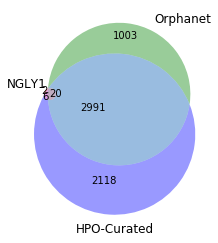

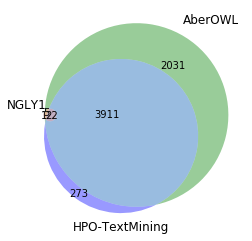

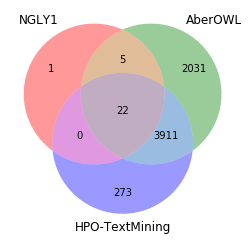

In [42]:
# Conclusion: All five datasets have NGLY1 symptoms.
# Overlap between sources
# Curated
venn3([ngly1,orphanet,hpo], ('NGLY1', 'Orphanet', 'HPO-Curated'))
plt.show()
# Text mined 
venn3([ngly1,aberowl,hpotm], ('NGLY1', 'AberOWL', 'HPO-TextMining'))
plt.show()
venn3_unweighted([ngly1,aberowl,hpotm], ('NGLY1', 'AberOWL', 'HPO-TextMining'))
plt.show()

In [43]:
# Data integration: How many NGLY1 symptoms we will recover
intersection_hp = (ngly1 & (hsdn | orphanet | hpo | aberowl | hpotm))
not_mapped_hp = (ngly1 - intersection_hp)
print('Number of NGLY1 symptoms (HP) uncovered with data integration: {}/{}'.format(len(intersection_hp),len(ngly1_sym_hp_list)))
print('Number of NGLY1 symptoms (HP) not covered with data integration: {}/{}'.format(len(not_mapped_hp),len(ngly1_sym_hp_list)))
print('NGLY1 symptoms (MESH) not covered with data integration:')
not_mapped_dict = {'hp_code' : list(not_mapped_hp)}
not_mapped_hp_df = pd.DataFrame.from_dict(data=not_mapped_dict)
not_mapped_terms_df = pd.merge(not_mapped_hp_df,ngly1_sym_hp_df, on='hp_code')
ngly1_hp_not_mapped_terms_df = not_mapped_terms_df
not_mapped_terms_df

Number of NGLY1 symptoms (HP) uncovered with data integration: 27/28
Number of NGLY1 symptoms (HP) not covered with data integration: 1/28
NGLY1 symptoms (MESH) not covered with data integration:


,hp_code,hp_term
0,HP:0012638,Abnormality of nervous system physiology


In [44]:
# NLGY symptoms anchor by data integration
mapped_dict = {'hp_code' : list(intersection_hp)}
mapped_hp_df = pd.DataFrame.from_dict(data=mapped_dict)
mapped_terms_df = pd.merge(mapped_hp_df,ngly1_sym_hp_df, on='hp_code')
print('NGLY1 symptoms (HP) covered with data integration:')
mapped_terms_df

NGLY1 symptoms (HP) covered with data integration:


,hp_code,hp_term
0,HP:0000657,Oculomotor apraxia
1,HP:0001252,Muscular hypotonia
2,HP:0000007,Autosomal recessive inheritance
3,HP:0002650,Scoliosis
4,HP:0012448,Delayed myelination
5,HP:0004305,Involuntary movements
6,HP:0001250,Seizures
7,HP:0002151,Increased serum lactate
8,HP:0006254,Elevated alpha-fetoprotein
9,HP:0000486,Strabismus


In [45]:
# check 3 HP sym in hetnet
ngly1_hetnet = (ngly1 & hetionet)
print('NGLY1 symptoms (HP) in hetnet: {}'.format(ngly1_hetnet))

NGLY1 symptoms (HP) in hetnet: {'HP:0002019', 'HP:0001250', 'HP:0001252'}


## HETNET DISEASES OVERLAPS: hetnet - datasets
What dataset covers more hetnet diseases?
- AberOWL dataset (136/137)

What dataset covers less number?
- Orphanet (4/137)

Number of hetnet diseases uncovered with data integration: 136/137
Number of hetnet diseases not covered with data integration: 1/137
Hetnet disease not covered with data integration:

doid	name	source	pathophysiology
DOID:9917	pleural cancer	DOcancerslim	neoplastic

##### Note: List of hetnet diseases comes from DO nodes integrated in the network; MONDO orphanet2do and DO mesh2do mappings

In [46]:
# Load mondo orphanet2do mappings
mondo_mappings = pd.read_table("/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data-JAN2016/mondo-orpha2do-mappings.tsv".format(path))
mondo_mappings.head(2)

,orphanet,do
0,Orphanet:205,DOID:3803
1,Orphanet:79213,DOID:12798


In [47]:
# load hetnet diseases (DO)
# source: Disease nodes from hetionet v1.0 [https://github.com/dhimmel/integrate/blob/master/integrate.ipynb]
commit = '75050ea2d4f60e745d3f3578ae03560a2cc0e444'
#url = rawgit('dhimmel', 'disease-ontology', commit, 'data/slim-terms.tsv')
url = 'https://raw.githubusercontent.com/dhimmel/disease-ontology/' + commit + '/data/slim-terms.tsv'
hetionet_dis_do_df = pd.read_table(url)
hetionet_dis_do_df.head(2)
#len(hetionet_dis_do_df.doid.unique()) # 137

,doid,name,source,pathophysiology
0,DOID:2531,hematologic cancer,DOcancerslim,neoplastic
1,DOID:1319,brain cancer,DOcancerslim,neoplastic


Hetionet diseases (DO): 137
HSDN diseases (DO): 2516
Orphanet diseases (DO): 612
HPO Curated diseases (DO): 1317
HPO text mining diseases (DO): 2086
AberOWL diseases (DO): 6100


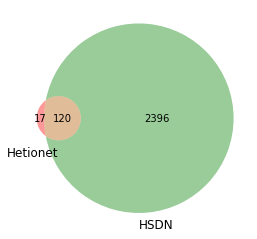

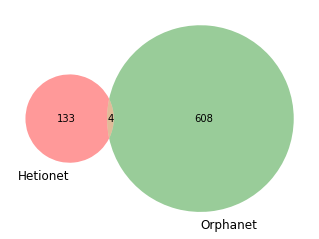

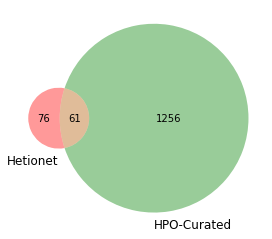

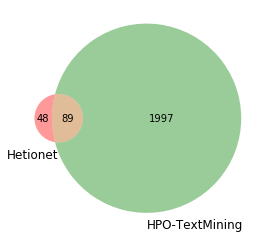

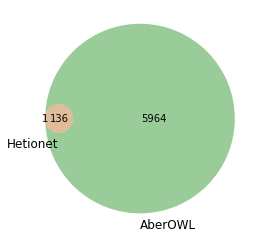

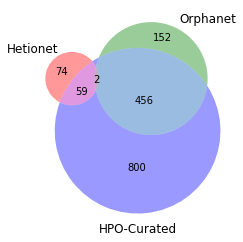

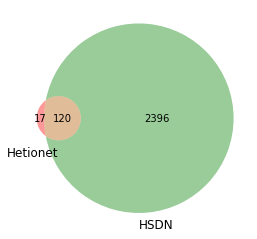

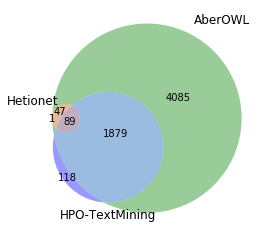

In [48]:
# hetionet
hetionet_dis_do_list = hetionet_dis_do_df.doid.unique()
hetionet = set(hetionet_dis_do_list)
# hsdn (DO do2mesh mappings)
do_mappings = pd.read_table('/home/nuria/workspace/repurposing-hetio/rephetio-dhimmelstein/hetionet+hpo/data-JAN2016/do-do2mesh-mappings.tsv')
do_mappings.head(2)
hsdn_dis_do_df = hsdn_df.merge(do_mappings, left_on='disease_meshid', right_on='mesh_code')
hsdn_dis_do_list = hsdn_dis_do_df.do_code.unique()
hsdn = set(hsdn_dis_do_list)
# Orphanet (MONDO orphanet2do mappings)
orpha_dis_do_df = orphanet_df.merge(mondo_mappings, left_on='orphanet_code', right_on='orphanet')
orpha_dis_do_list =orpha_dis_do_df.do.unique()
orphanet = set(orpha_dis_do_list)
# HPO Curated
hpo_dis_do_list = hpo_df.do_id.unique()
hpo = set(hpo_dis_do_list)
# Groza
tg_dis_do_list = tg_df.do_id.unique()
hpotm = set(tg_dis_do_list)
# Hoehndorf
rh_dis_do_list = rh_df.do_id.unique()
aberowl = set(rh_dis_do_list)
# Counts
print('Hetionet diseases (DO): {}'.format(len(hetionet_dis_do_list)))
print('HSDN diseases (DO): {}'.format(len(hsdn_dis_do_list)))
print('Orphanet diseases (DO): {}'.format(len(orpha_dis_do_list)))
print('HPO Curated diseases (DO): {}'.format(len(hpo_dis_do_list)))
print('HPO text mining diseases (DO): {}'.format(len(tg_dis_do_list)))
print('AberOWL diseases (DO): {}'.format(len(rh_dis_do_list)))
# Coverage
venn2([hetionet,hsdn],('Hetionet', 'HSDN'))
plt.show()
venn2([hetionet,orphanet],('Hetionet', 'Orphanet'))
plt.show()
venn2([hetionet,hpo],('Hetionet', 'HPO-Curated'))
plt.show()
venn2([hetionet,hpotm],('Hetionet', 'HPO-TextMining'))
plt.show()
venn2([hetionet,aberowl],('Hetionet', 'AberOWL'))
plt.show()
# Overlap between sources
# Curated
venn3([hetionet,orphanet,hpo], ('Hetionet', 'Orphanet', 'HPO-Curated'))
plt.show()
# Data mined
venn2([hetionet,hsdn], ('Hetionet', 'HSDN'))
plt.show()
# Text mined 
venn3([hetionet,aberowl,hpotm], ('Hetionet', 'AberOWL', 'HPO-TextMining'))
plt.show()

In [49]:
# Data integration: How many hetnet diseases we will recover
intersection_do = (hetionet & (hsdn | orphanet | hpo | aberowl | hpotm))
not_mapped_do = (hetionet - intersection_do)
print('Number of hetnet diseases uncovered with data integration: {}/{}'.format(len(intersection_do),len(hetionet_dis_do_list)))
print('Number of hetnet diseases not covered with data integration: {}/{}'.format(len(not_mapped_do),len(hetionet_dis_do_list)))
print('Hetnet diseases not covered with data integration:')
not_mapped_dict = {'doid' : list(not_mapped_do)}
not_mapped_do_df = pd.DataFrame.from_dict(data=not_mapped_dict)
not_mapped_terms_df = pd.merge(not_mapped_do_df,hetionet_dis_do_df, on='doid')
not_mapped_terms_df

Number of hetnet diseases uncovered with data integration: 136/137
Number of hetnet diseases not covered with data integration: 1/137
Hetnet diseases not covered with data integration:


,doid,name,source,pathophysiology
0,DOID:9917,pleural cancer,DOcancerslim,neoplastic


## NGLY1 SYM - HETNET DIS ASSOCIATIONS

In [50]:
# mappings
hpo_umls_mappings = hpo_umls_mappings.loc[:,['hp_code', 'mesh_code']]
hpo_umls_mappings.head(2)

,hp_code,mesh_code
0,HP:0200042,MESH:D012883
1,HP:0000873,MESH:D003919


### OVERLAP DO-MESH

In [51]:
# hetionet diseases
hetionet_do_mesh_df = hetionet_df.loc[:,['doid_code', 'mesh_id']]
hetionet_do_mesh_df['association'] = hetionet_do_mesh_df.loc[:,['doid_code', 'mesh_id']].apply(lambda x: '-'.join(x), axis=1)
len(hetionet_do_mesh_df) # 56658
hetionet = set(hetionet_do_mesh_df.association)
len(hetionet) # 56658
len(hetionet_df[['doid_code']].drop_duplicates()) # DisPhe set: 133 diseases
len(hetionet_dis_do_df[['doid']].drop_duplicates()) # Hetionet disease list (DO slim list): 137 diseases
hetnet_df = pd.DataFrame(columns=['doid'])
hetnet_df['doid'] = hetionet_dis_do_df[['doid']]
hetnet_df.rename(columns={'doid' : 'doid_code'}, inplace=True)
hetnet_df.head(2) # 137 diseases 

,doid_code
0,DOID:2531
1,DOID:1319


In [52]:
# ngly mesh sym not in hetnet
ngly1_sym_mesh_total = set(ngly1_sym_mesh_df.mesh_code)
ngly1_sym_mesh_InHetnet = (ngly1_sym_mesh_total & set(hetionet_do_mesh_df.mesh_id))
ngly1_sym_mesh_notInHetnet = ( ngly1_sym_mesh_total - ngly1_sym_mesh_InHetnet )
len(ngly1_sym_mesh_notInHetnet) # 10
ndict = {'mesh_code' : list(ngly1_sym_mesh_notInHetnet)}
ngly1_df = pd.DataFrame.from_dict(data=ndict)
ngly1_df # 10 symptoms (hyperlactatemia (MESH:D065906) node is in hetnet but without sym edge)

,mesh_code
0,MESH:D007567
1,MESH:D013285
2,MESH:D065906
3,MESH:D008831
4,MESH:D008103
5,MESH:C562827
6,MESH:D005317
7,MESH:D012600
8,MESH:D003320
9,MESH:D017043


In [53]:
# HSDN (0 new ngly1 sym mesh)

In [54]:
# orphanet (4 new ngly1 sym mesh)
orpha_ordo2do_hp_df = orphanet_df.merge(mondo_mappings, left_on='orphanet_code', right_on='orphanet')
orpha_ordo2do_hp2mesh_df = orpha_ordo2do_hp_df.merge(hpo_umls_mappings, on='hp_code')
orpha_df = orpha_ordo2do_hp2mesh_df.loc[:,['do', 'mesh_code']]
orpha_df['association'] = orpha_df.loc[:, ['do', 'mesh_code']].apply(lambda x: '-'.join(x), axis =1)
orpha_df.rename(columns={'do' : 'doid_code'}, inplace=True)
orpha_df.head(2) # 7370

,doid_code,mesh_code,association
0,DOID:3753,MESH:D051437,DOID:3753-MESH:D051437
1,DOID:12387,MESH:D051437,DOID:12387-MESH:D051437


In [55]:
# subsetting the associations with a ngly1 sym and a hetnet disease
orpha_ngly1_df = orpha_df.merge(ngly1_df, on='mesh_code'); orpha_ngly1_df.shape # 280 ass with ngly1
orpha_het_df = orpha_df.merge(hetnet_df, on='doid_code'); orpha_het_df.shape # 75 ass with het diseases
orpha_het_ngly1_df = orpha_ngly1_df.merge(hetnet_df, on='doid_code'); orpha_het_ngly1_df.shape # 0 ass ngly1 - het diseases

(0, 3)

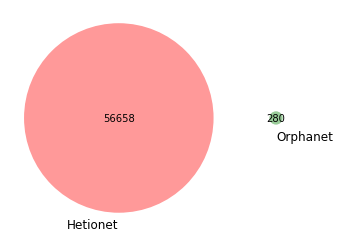

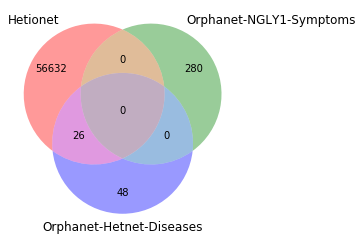

In [56]:
# no direct hetnet_disease-ngly1_symptom edges in Orphanet
# ngly1 symptoms not in hetionet that have disease annotation in an external source
orpha_ngly1 = set(orpha_ngly1_df.association)
orpha_hetnet = set(orpha_het_df.association)
venn2([hetionet,orpha_ngly1], ('Hetionet', 'Orphanet'))
plt.show()
venn3_unweighted([hetionet,orpha_ngly1,orpha_hetnet], ('Hetionet', 'Orphanet-NGLY1-Symptoms', 'Orphanet-Hetnet-Diseases'))
plt.show()

In [57]:
# HPO Curated (4 new ngly1 sym mesh)
hpo_df.rename(columns={'do_id' : 'doid_code', 'hp_id' : 'hp_code' }, inplace=True)
hpo_hp2mesh_df = hpo_df.merge(hpo_umls_mappings, on='hp_code')
# Lost diseases due to mapping:
len(hpo_df.doid_code.unique()) # 1317
len(hpo_hp2mesh_df.doid_code.unique()) # 1251
hpoc_df = hpo_hp2mesh_df.loc[:,['doid_code', 'mesh_code']]
hpoc_df['association'] = hpoc_df.loc[:, ['doid_code', 'mesh_code']].apply(lambda x: '-'.join(x), axis =1)
hpoc_df.head(2) # 14400

,doid_code,mesh_code,association
0,DOID:1440,MESH:D001763,DOID:1440-MESH:D001763
1,DOID:0060391,MESH:D001763,DOID:0060391-MESH:D001763


In [58]:
# subsetting the associations with a ngly1 sym and a hetnet disease
hpo_ngly1_df = hpoc_df.merge(ngly1_df, on='mesh_code'); hpo_ngly1_df.shape # 573 ass with ngly1
hpo_het_df = hpoc_df.merge(hetnet_df, on='doid_code'); hpo_het_df.shape # 430 ass with het diseases
hpo_het_ngly1_df = hpo_ngly1_df.merge(hetnet_df, on='doid_code'); hpo_het_ngly1_df.shape # 3 ass ngly1 - het diseases

(3, 3)

In [59]:
# 3 direct hetnet_disease-ngly1_symptom edges in HPO Curated
hpo_het_ngly1_df

,doid_code,mesh_code,association
0,DOID:0050156,MESH:D008103,DOID:0050156-MESH:D008103
1,DOID:12849,MESH:D013285,DOID:12849-MESH:D013285
2,DOID:12849,MESH:D012600,DOID:12849-MESH:D012600


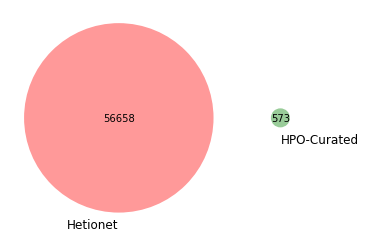

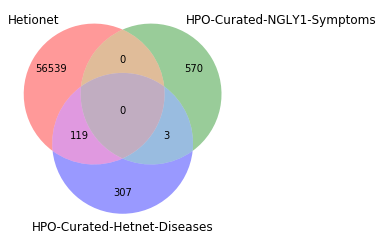

In [60]:
# ngly1 symptoms not in hetionet that have disease annotation in an external source
hpoc_ngly1 = set(hpo_ngly1_df.association)
hpoc_hetnet = set(hpo_het_df.association)
venn2([hetionet,hpoc_ngly1], ('Hetionet', 'HPO-Curated'))
plt.show()
venn3_unweighted([hetionet,hpoc_ngly1,hpoc_hetnet], ('Hetionet', 'HPO-Curated-NGLY1-Symptoms', 'HPO-Curated-Hetnet-Diseases'))
plt.show()

In [61]:
# HPO Text mining (5 new ngly1 sym mesh)
tg_df.rename(columns={'do_id':'doid_code', 'hp_id':'hp_code'}, inplace=True)
hpotg_hp2mesh_df = tg_df.merge(hpo_umls_mappings, on='hp_code')
# Lost diseases due to mapping:
len(tg_df.doid_code.unique()) # 2086
len(hpotg_hp2mesh_df.doid_code.unique()) # 2081
hpotg_df = hpotg_hp2mesh_df.loc[:,['doid_code', 'mesh_code']]
hpotg_df['association'] = hpotg_df.loc[:, ['doid_code', 'mesh_code']].apply(lambda x: '-'.join(x), axis =1)
hpotg_df.head(2) # 61563

,doid_code,mesh_code,association
0,DOID:11512,MESH:D006502,DOID:11512-MESH:D006502
1,DOID:2988,MESH:D006502,DOID:2988-MESH:D006502


In [62]:
# subsetting the associations with a ngly1 sym and a hetnet disease
hpotg_ngly1_df = hpotg_df.merge(ngly1_df, on='mesh_code'); hpotg_ngly1_df.shape # 413 ass with ngly1
hpotg_het_df = hpotg_df.merge(hetnet_df, on='doid_code'); hpotg_het_df.shape # 5908 ass with het diseases
hpotg_het_ngly1_df = hpotg_ngly1_df.merge(hetnet_df, on='doid_code'); hpotg_het_ngly1_df.shape # 19 ass ngly1 - het diseases

(19, 3)

In [63]:
# 19 direct hetnet_disease-ngly1_symptom edges in HPO Text mining
hpotg_het_ngly1_df

,doid_code,mesh_code,association
0,DOID:14221,MESH:D008103,DOID:14221-MESH:D008103
1,DOID:263,MESH:D008103,DOID:263-MESH:D008103
2,DOID:7148,MESH:D008103,DOID:7148-MESH:D008103
3,DOID:9744,MESH:D008103,DOID:9744-MESH:D008103
4,DOID:9352,MESH:D008103,DOID:9352-MESH:D008103
5,DOID:2986,MESH:D008103,DOID:2986-MESH:D008103
6,DOID:3571,MESH:D008103,DOID:3571-MESH:D008103
7,DOID:9074,MESH:D008103,DOID:9074-MESH:D008103
8,DOID:2043,MESH:D008103,DOID:2043-MESH:D008103
9,DOID:1459,MESH:D008103,DOID:1459-MESH:D008103


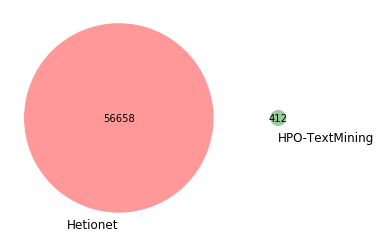

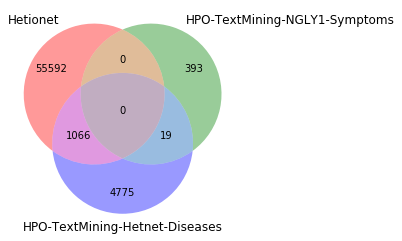

In [64]:
# ngly1 symptoms not in hetionet that have disease annotation in an external source
hpotg_ngly1 = set(hpotg_ngly1_df.association)
hpotg_hetnet = set(hpotg_het_df.association)
venn2([hetionet,hpotg_ngly1], ('Hetionet', 'HPO-TextMining'))
plt.show()
venn3_unweighted([hetionet,hpotg_ngly1,hpotg_hetnet], ('Hetionet', 'HPO-TextMining-NGLY1-Symptoms', 'HPO-TextMining-Hetnet-Diseases'))
plt.show()

In [65]:
# AberOWL Text mining (5 new ngly1 sym mesh)
rh_df.rename(columns={'do_id':'doid_code', 'hp_id':'hp_code'}, inplace=True)
rh_hp2mesh_df = rh_df.merge(hpo_umls_mappings, on='hp_code')
# Lost diseases due to mapping:
len(rh_df.doid_code.unique()) # 6100
len(rh_hp2mesh_df.doid_code.unique()) # 6005
rhtm_df = rh_hp2mesh_df.loc[:,['doid_code', 'mesh_code']]
rhtm_df['association'] = rhtm_df.loc[:, ['doid_code', 'mesh_code']].apply(lambda x: '-'.join(x), axis =1)
rhtm_df.head(2) # 30187

,doid_code,mesh_code,association
0,DOID:0060262,MESH:D002764,DOID:0060262-MESH:D002764
1,DOID:0050050,MESH:D002764,DOID:0050050-MESH:D002764


In [66]:
# subsetting the associations with a ngly1 sym and a hetnet disease
rh_ngly1_df = rhtm_df.merge(ngly1_df, on='mesh_code'); rh_ngly1_df.shape # 145 ass with ngly1
rh_het_df = rhtm_df.merge(hetnet_df, on='doid_code'); rh_het_df.shape # 707 ass with het diseases
rh_het_ngly1_df = rh_ngly1_df.merge(hetnet_df, on='doid_code'); rh_het_ngly1_df.shape # 1 ass ngly1 - het diseases

(1, 3)

In [67]:
# 1 direct hetnet_disease-ngly1_symptom edges in AberOWL
rh_het_ngly1_df

,doid_code,mesh_code,association
0,DOID:9835,MESH:D013285,DOID:9835-MESH:D013285


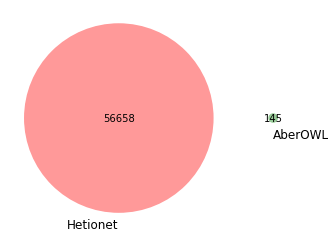

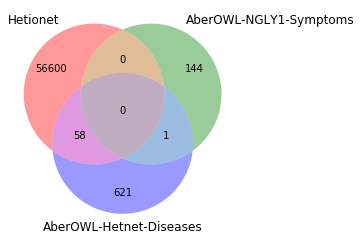

In [68]:
# ngly1 symptoms not in hetionet that have disease annotation in an external source
rh_ngly1 = set(rh_ngly1_df.association)
rh_hetnet = set(rh_het_df.association)
venn2([hetionet,rh_ngly1], ('Hetionet', 'AberOWL'))
plt.show()
venn3_unweighted([hetionet,rh_ngly1,rh_hetnet], ('Hetionet', 'AberOWL-NGLY1-Symptoms', 'AberOWL-Hetnet-Diseases'))
plt.show()

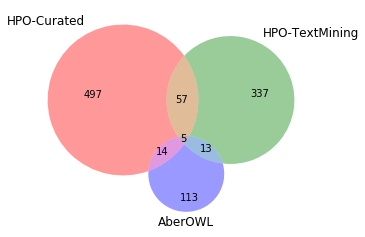

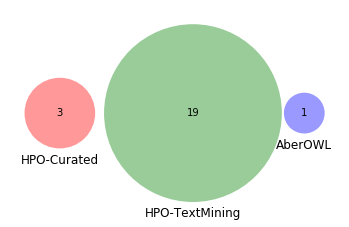

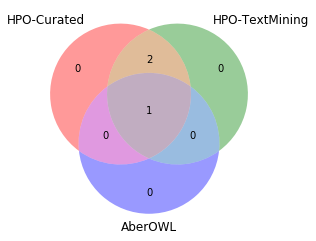

ngly1-hetnet dis-sym in HPO curated: {'MESH:D012600', 'MESH:D013285', 'MESH:D008103'}
ngly1-hetnet dis-sym in HPO Text mining: {'MESH:D012600', 'MESH:D013285', 'MESH:D008103'}
ngly1-hetnet dis-sym in AberOWL: {'MESH:D013285'}


In [69]:
# overlap ngly1_Sym-Disease edges
venn3([hpoc_ngly1,hpotg_ngly1,rh_ngly1], ('HPO-Curated', 'HPO-TextMining', 'AberOWL'))
plt.show()
# overlap ngly1_Sym-Hetnet_Disease edges
hpoc = set(hpo_het_ngly1_df.association)
hpotg = set(hpotg_het_ngly1_df.association)
aber = set(rh_het_ngly1_df.association)
venn3([hpoc,hpotg,aber], ('HPO-Curated', 'HPO-TextMining', 'AberOWL'))
plt.show()
# overlap ngly1 sym nodes with edge to hetnet found in external sources
hpoc = set(hpo_het_ngly1_df.mesh_code)
hpotg = set(hpotg_het_ngly1_df.mesh_code)
aber = set(rh_het_ngly1_df.mesh_code)
venn3_unweighted([hpoc,hpotg,aber], ('HPO-Curated', 'HPO-TextMining', 'AberOWL'))
plt.show()
print('ngly1-hetnet dis-sym in HPO curated: {}'.format(hpoc))
print('ngly1-hetnet dis-sym in HPO Text mining: {}'.format(hpotg))
print('ngly1-hetnet dis-sym in AberOWL: {}'.format(aber))

In [70]:
# Total NGLY1 symptoms described in MESH (15)
ngly1_sym_mesh_df

,mesh_code,mesh_term
0,MESH:D009123,Muscle Hypotonia
1,MESH:C562827,Alacrima
2,MESH:D003248,Constipation
3,MESH:D012021,Abnormal Deep Tendon Reflex
4,MESH:D008831,Microcephaly
5,MESH:D005317,IUGR (intrauterine growth restriction)
6,MESH:D065906,Hyperlactatemia
7,MESH:D012640,Seizures
8,MESH:D001072,Apraxias
9,MESH:D003320,Corneal Ulcer


In [71]:
# Total NGLY1 symptoms not in hetnet (10)
ngly1_df = ngly1_df.merge(ngly1_sym_mesh_df, how='left', on='mesh_code')
ngly1_df

,mesh_code,mesh_term
0,MESH:D007567,Neonatal Jaundice
1,MESH:D013285,Strabismus
2,MESH:D065906,Hyperlactatemia
3,MESH:D008831,Microcephaly
4,MESH:D008103,Liver Fibrosis
5,MESH:C562827,Alacrima
6,MESH:D005317,IUGR (intrauterine growth restriction)
7,MESH:D012600,Scoliosis
8,MESH:D003320,Corneal Ulcer
9,MESH:D017043,Chalazions


In [72]:
# Total NGLY1 symptoms not in hetnet and not in external datasets -> text mining (3)
ngly1_not_mapped_terms_df

,mesh_code,mesh_term
0,MESH:D065906,Hyperlactatemia
1,MESH:D007567,Neonatal Jaundice
2,MESH:D005317,IUGR (intrauterine growth restriction)


In [73]:
# list of ngly1 sym (mesh) that we can anchor to hetnet (7/10 ngly1 not in hetnet found in external sources) (3)
ngly1_anchor_edge = set(hpoc | hpotg | aber)
data = {'mesh_code':list(ngly1_anchor_edge)}
ngly1_anchor_edge_df = pd.DataFrame.from_dict(data)
ngly1_anchor_edge_df = ngly1_anchor_edge_df.merge(ngly1_sym_mesh_df, how='left', on='mesh_code')
ngly1_anchor_edge_df

,mesh_code,mesh_term
0,MESH:D012600,Scoliosis
1,MESH:D013285,Strabismus
2,MESH:D008103,Liver Fibrosis


In [74]:
# ngly1 sym without a link to a hetnet disease but with link to other diseases in the datasets
len(set(orpha_ngly1_df.mesh_code)) # 5
orpha_ngly1_do_set = (set(orpha_ngly1_df.mesh_code) - set(orpha_het_ngly1_df.mesh_code))
orpha_ngly1_do_set

{'MESH:C562827',
 'MESH:D008103',
 'MESH:D008831',
 'MESH:D012600',
 'MESH:D013285'}

In [75]:
len(set(hpo_ngly1_df.mesh_code)) # 6
hpo_ngly1_do_set = (set(hpo_ngly1_df.mesh_code) - set(hpo_het_ngly1_df.mesh_code))
hpo_ngly1_do_set

{'MESH:C562827', 'MESH:D003320', 'MESH:D008831'}

In [76]:
len(set(hpotg_ngly1_df.mesh_code)) # 6
hpotg_ngly1_do_set = (set(hpotg_ngly1_df.mesh_code) - set(hpotg_het_ngly1_df.mesh_code))
hpotg_ngly1_do_set

{'MESH:C562827', 'MESH:D008831', 'MESH:D017043'}

In [77]:
len(set(rh_ngly1_df.mesh_code)) # 7
rh_ngly1_do_set = (set(rh_ngly1_df.mesh_code) - set(rh_het_ngly1_df.mesh_code))
rh_ngly1_do_set

{'MESH:C562827',
 'MESH:D003320',
 'MESH:D008103',
 'MESH:D008831',
 'MESH:D012600',
 'MESH:D017043'}

In [78]:
all_ngly1_set = (set(orpha_ngly1_df.mesh_code) | set(hpo_ngly1_df.mesh_code) | set(hpotg_ngly1_df.mesh_code) | set(rh_ngly1_df.mesh_code))
all_ngly1_het_set = (set(orpha_het_ngly1_df.mesh_code) | set(hpo_het_ngly1_df.mesh_code) | set(hpotg_het_ngly1_df.mesh_code) | set(rh_het_ngly1_df.mesh_code))
all_ngly1_do_set = set(all_ngly1_set - all_ngly1_het_set)
len(all_ngly1_do_set) # 7
data = {'mesh_code': list(all_ngly1_do_set)}
all_ngly1_do_df = pd.DataFrame.from_dict(data)
all_ngly1_do_df = all_ngly1_do_df.merge(ngly1_sym_mesh_df, how='left', on='mesh_code')
all_ngly1_do_df

,mesh_code,mesh_term
0,MESH:D003320,Corneal Ulcer
1,MESH:D008831,Microcephaly
2,MESH:D017043,Chalazions
3,MESH:C562827,Alacrima


In [79]:
# check mesh
all = [orpha_het_ngly1_df, hpo_het_ngly1_df, hpotg_het_ngly1_df, rh_het_ngly1_df]
all_df = pd.concat(all)
all_df.mesh_code.unique()

array(['MESH:D008103', 'MESH:D013285', 'MESH:D012600'], dtype=object)

### OVERLAP DO-HPO

In [80]:
# hetionet
# mapping sym mesh to hp
hetionet_do_hp_df = hetionet_do_mesh_df.merge(hpo_umls_mappings, left_on='mesh_id', right_on='mesh_code')
hetionet_do_hp_df['association'] = hetionet_do_hp_df.loc[:,['doid_code', 'hp_code']].apply(lambda x: '-'.join(x), axis=1)
len(hetionet_do_hp_df) # 22211
hetionet = set(hetionet_do_hp_df.association)
len(hetionet) # 22211
len(hetionet_df[['doid_code']].drop_duplicates()) # DisPhe set: 133 diseases
len(hetionet_dis_do_df[['doid']].drop_duplicates()) # Hetionet disease list (DO slim list): 137 diseases
hetnet_df = pd.DataFrame(columns=['doid'])
hetnet_df['doid'] = hetionet_dis_do_df[['doid']]
hetnet_df.rename(columns={'doid' : 'doid_code'}, inplace=True)
hetnet_df.head(2) # 137 diseases

,doid_code
0,DOID:2531
1,DOID:1319


In [81]:
# ngly hp sym not in hetnet
ngly1_sym_hp_total = set(ngly1_sym_hp_df.hp_code)
ngly1_sym_hp_InHetnet = (ngly1_sym_hp_total & set(hetionet_do_hp_df.hp_code))
ngly1_sym_hp_notInHetnet = ( ngly1_sym_hp_total - ngly1_sym_hp_InHetnet )
len(ngly1_sym_hp_notInHetnet) # 25
ndict = {'hp_code' : list(ngly1_sym_hp_notInHetnet)}
ngly1_df = pd.DataFrame.from_dict(data=ndict)
ngly1_df.head(2) # 25 symptoms

,hp_code
0,HP:0012804
1,HP:0000657


In [82]:
# HSDN (0 new ngly1 sym mesh)

In [83]:
# orphanet (5 new ngly1 sym mesh)
orpha_ordo2do_hp_df = orphanet_df.merge(mondo_mappings, left_on='orphanet_code', right_on='orphanet')
orpha_df = orpha_ordo2do_hp_df.loc[:,['do', 'hp_code']]
orpha_df['association'] = orpha_df.loc[:, ['do', 'hp_code']].apply(lambda x: '-'.join(x), axis =1)
orpha_df.rename(columns={'do' : 'doid_code'}, inplace=True)
orpha_df.head(2) # 16161

,doid_code,hp_code,association
0,DOID:3753,HP:0000083,DOID:3753-HP:0000083
1,DOID:3753,HP:0000421,DOID:3753-HP:0000421


In [84]:
# subsetting the associations with a ngly1 sym and a hetnet disease
orpha_ngly1_df = orpha_df.merge(ngly1_df, on='hp_code'); orpha_ngly1_df.shape # 511 ass with ngly1
orpha_het_df = orpha_df.merge(hetnet_df, on='doid_code'); orpha_het_df.shape # 115 ass with het diseases
orpha_het_ngly1_df = orpha_ngly1_df.merge(hetnet_df, on='doid_code'); orpha_het_ngly1_df.shape # 1 ass ngly1 - het diseases

(1, 3)

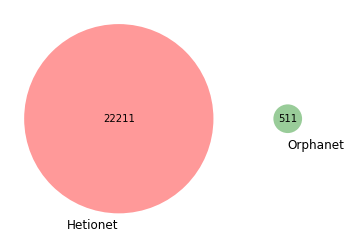

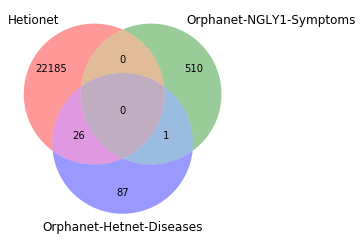

In [85]:
# 1 direct hetnet_disease-ngly1_symptom edges in Orphanet
# ngly1 symptoms not in hetionet that have disease annotation in an external source
orpha_ngly1 = set(orpha_ngly1_df.association)
orpha_hetnet = set(orpha_het_df.association)
venn2([hetionet,orpha_ngly1], ('Hetionet', 'Orphanet'))
plt.show()
venn3_unweighted([hetionet,orpha_ngly1,orpha_hetnet], ('Hetionet', 'Orphanet-NGLY1-Symptoms', 'Orphanet-Hetnet-Diseases'))
plt.show()

In [86]:
# HPO Curated (6 new ngly1 sym mesh)
hpoc_df = hpo_df
hpoc_df['association'] = hpoc_df.loc[:, ['doid_code', 'hp_code']].apply(lambda x: '-'.join(x), axis =1)
hpoc_df.head(2) # 38913

,doid_code,hp_code,association
0,DOID:1440,HP:0000006,DOID:1440-HP:0000006
1,DOID:1440,HP:0000508,DOID:1440-HP:0000508


In [87]:
# subsetting the associations with a ngly1 sym and a hetnet disease
hpo_ngly1_df = hpoc_df.merge(ngly1_df, on='hp_code'); hpo_ngly1_df.shape # 1636 ass with ngly1
hpo_het_df = hpoc_df.merge(hetnet_df, on='doid_code'); hpo_het_df.shape # 889 ass with het diseases
hpo_het_ngly1_df = hpo_ngly1_df.merge(hetnet_df, on='doid_code'); hpo_het_ngly1_df.shape # 18 ass ngly1 - het diseases

(18, 3)

In [88]:
# 18 direct hetnet_disease-ngly1_symptom edges in HPO Curated
hpo_het_ngly1_df

,doid_code,hp_code,association
0,DOID:14227,HP:0000007,DOID:14227-HP:0000007
1,DOID:14330,HP:0000007,DOID:14330-HP:0000007
2,DOID:8398,HP:0000007,DOID:8398-HP:0000007
3,DOID:12930,HP:0000007,DOID:12930-HP:0000007
4,DOID:10608,HP:0000007,DOID:10608-HP:0000007
5,DOID:10608,HP:0002910,DOID:10608-HP:0002910
6,DOID:1324,HP:0000007,DOID:1324-HP:0000007
7,DOID:1312,HP:0000007,DOID:1312-HP:0000007
8,DOID:3393,HP:0000007,DOID:3393-HP:0000007
9,DOID:9074,HP:0000007,DOID:9074-HP:0000007


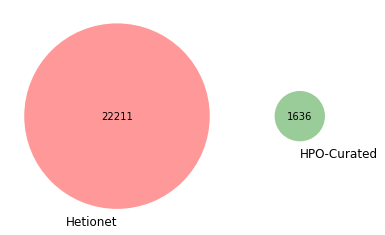

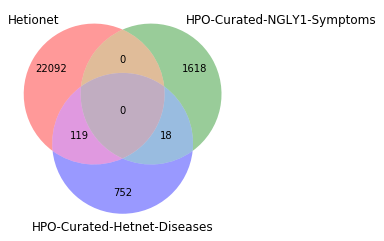

In [89]:
# ngly1 symptoms not in hetionet that have disease annotation in an external source
hpoc_ngly1 = set(hpo_ngly1_df.association)
hpoc_hetnet = set(hpo_het_df.association)
venn2([hetionet,hpoc_ngly1], ('Hetionet', 'HPO-Curated'))
plt.show()
venn3_unweighted([hetionet,hpoc_ngly1,hpoc_hetnet], ('Hetionet', 'HPO-Curated-NGLY1-Symptoms', 'HPO-Curated-Hetnet-Diseases'))
plt.show()

In [90]:
# HPO Text mining (6 new ngly1 sym mesh)
hpotg_df = tg_df
hpotg_df['association'] = hpotg_df.loc[:, ['doid_code', 'hp_code']].apply(lambda x: '-'.join(x), axis =1)
hpotg_df.head(2) # 95045

,doid_code,hp_code,association
0,DOID:11512,HP:0002639,DOID:11512-HP:0002639
1,DOID:11512,HP:0001541,DOID:11512-HP:0001541


In [91]:
# subsetting the associations with a ngly1 sym and a hetnet disease
hpotg_ngly1_df = hpotg_df.merge(ngly1_df, on='hp_code'); hpotg_ngly1_df.shape # 1094 ass with ngly1
hpotg_het_df = hpotg_df.merge(hetnet_df, on='doid_code'); hpotg_het_df.shape # 8507 ass with het diseases
hpotg_het_ngly1_df = hpotg_ngly1_df.merge(hetnet_df, on='doid_code'); hpotg_het_ngly1_df.shape # 79 ass ngly1 - het diseases

(79, 3)

In [92]:
# 79 direct hetnet_disease-ngly1_symptom edges in HPO Curated
hpotg_het_ngly1_df.head(5)

,doid_code,hp_code,association
0,DOID:13378,HP:0002910,DOID:13378-HP:0002910
1,DOID:14221,HP:0002910,DOID:14221-HP:0002910
2,DOID:14221,HP:0001395,DOID:14221-HP:0001395
3,DOID:263,HP:0002910,DOID:263-HP:0002910
4,DOID:635,HP:0002910,DOID:635-HP:0002910


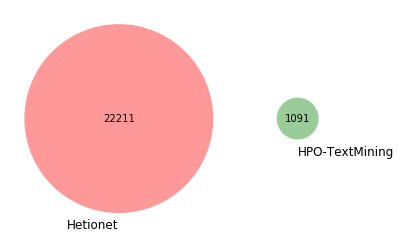

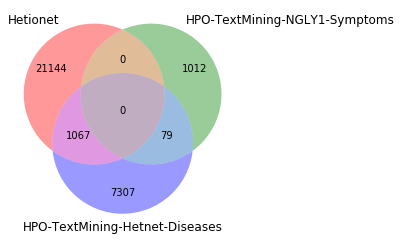

In [93]:
# ngly1 symptoms not in hetionet that have disease annotation in an external source
hpotg_ngly1 = set(hpotg_ngly1_df.association)
hpotg_hetnet = set(hpotg_het_df.association)
venn2([hetionet,hpotg_ngly1], ('Hetionet', 'HPO-TextMining'))
plt.show()
venn3_unweighted([hetionet,hpotg_ngly1,hpotg_hetnet], ('Hetionet', 'HPO-TextMining-NGLY1-Symptoms', 'HPO-TextMining-Hetnet-Diseases'))
plt.show()

In [94]:
# AberOWL Text mining (7 new ngly1 sym mesh)
rhtm_df = rh_df
rhtm_df['association'] = rhtm_df.loc[:, ['doid_code', 'hp_code']].apply(lambda x: '-'.join(x), axis =1)
rhtm_df.head(2) # 84508

,doid_code,hp_code,association
0,DOID:0060262,HP:0005264,DOID:0060262-HP:0005264
1,DOID:0060262,HP:0001082,DOID:0060262-HP:0001082


In [95]:
# subsetting the associations with a ngly1 sym and a hetnet disease
rh_ngly1_df = rhtm_df.merge(ngly1_df, on='hp_code'); rh_ngly1_df.shape # 541 ass with ngly1
rh_het_df = rhtm_df.merge(hetnet_df, on='doid_code'); rh_het_df.shape # 1934 ass with het diseases
rh_het_ngly1_df = rh_ngly1_df.merge(hetnet_df, on='doid_code'); rh_het_ngly1_df.shape # 1 ass ngly1 - het diseases

(6, 3)

In [96]:
# 6 direct hetnet_disease-ngly1_symptom edges in HPO Curated
rh_het_ngly1_df

,doid_code,hp_code,association
0,DOID:12236,HP:0001392,DOID:12236-HP:0001392
1,DOID:2043,HP:0001392,DOID:2043-HP:0001392
2,DOID:2043,HP:0001395,DOID:2043-HP:0001395
3,DOID:3571,HP:0001392,DOID:3571-HP:0001392
4,DOID:10763,HP:0002910,DOID:10763-HP:0002910
5,DOID:9835,HP:0000486,DOID:9835-HP:0000486


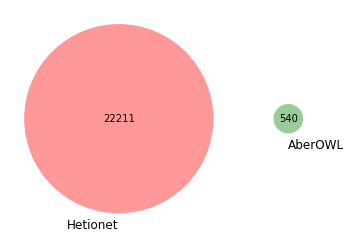

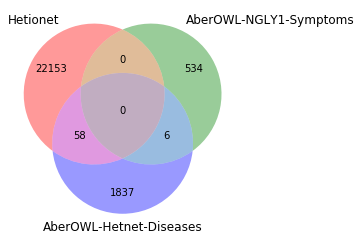

In [97]:
# ngly1 symptoms not in hetionet that have disease annotation in an external source
rh_ngly1 = set(rh_ngly1_df.association)
rh_hetnet = set(rh_het_df.association)
venn2([hetionet,rh_ngly1], ('Hetionet', 'AberOWL'))
plt.show()
venn3_unweighted([hetionet,rh_ngly1,rh_hetnet], ('Hetionet', 'AberOWL-NGLY1-Symptoms', 'AberOWL-Hetnet-Diseases'))
plt.show()

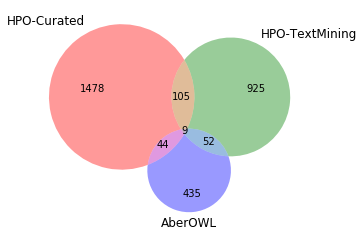

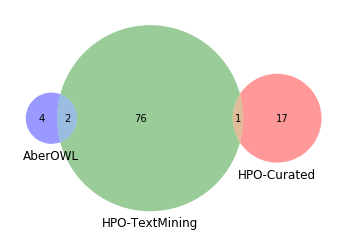

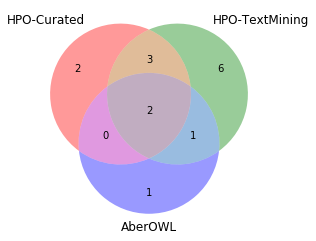

ngly1-hetnet dis-sym in HPO curated: {'HP:0000657', 'HP:0000007', 'HP:0009830', 'HP:0002650', 'HP:0002910', 'HP:0002353', 'HP:0000486'}
ngly1-hetnet dis-sym in HPO Text mining: {'HP:0004305', 'HP:0001266', 'HP:0001395', 'HP:0006579', 'HP:0009830', 'HP:0002910', 'HP:0002151', 'HP:0002353', 'HP:0002650', 'HP:0006254', 'HP:0001263', 'HP:0000486'}
ngly1-hetnet dis-sym in AberOWL: {'HP:0001392', 'HP:0001395', 'HP:0000486', 'HP:0002910'}


In [98]:
# overlap ngly1_Sym-Disease edges
venn3([hpoc_ngly1,hpotg_ngly1,rh_ngly1], ('HPO-Curated', 'HPO-TextMining', 'AberOWL'))
plt.show()
# overlap ngly1_Sym-Hetnet_Disease edges
hpoc = set(hpo_het_ngly1_df.association)
hpotg = set(hpotg_het_ngly1_df.association)
aber = set(rh_het_ngly1_df.association)
venn3([hpoc,hpotg,aber], ('HPO-Curated', 'HPO-TextMining', 'AberOWL'))
plt.show()
# overlap ngly1 sym nodes with edge to hetnet found in external sources
hpoc = set(hpo_het_ngly1_df.hp_code)
hpotg = set(hpotg_het_ngly1_df.hp_code)
aber = set(rh_het_ngly1_df.hp_code)
venn3_unweighted([hpoc,hpotg,aber], ('HPO-Curated', 'HPO-TextMining', 'AberOWL'))
plt.show()
print('ngly1-hetnet dis-sym in HPO curated: {}'.format(hpoc))
print('ngly1-hetnet dis-sym in HPO Text mining: {}'.format(hpotg))
print('ngly1-hetnet dis-sym in AberOWL: {}'.format(aber))

In [99]:
# Total NGLY1 symptoms described in HP (28)
ngly1_sym_hp_df

,hp_code,hp_term
0,HP:0001263,Global developmental delay
1,HP:0001252,Muscular hypotonia
2,HP:0004305,Involuntary movements
3,HP:0000522,Alacrima/hypolacrima
4,HP:0002353,EEG abnormality
5,HP:0002019,Constipation
6,HP:0002910,Elevated hepatic transaminases
7,HP:0012638,Abnormality of nervous system physiology
8,HP:0200101,Decreased/absent ankle reflexes
9,HP:0000252,Microcephaly


In [100]:
# Total NGLY1 symptoms not in hetnet (25)
ngly1_df = ngly1_df.merge(ngly1_sym_hp_df, how='left', on='hp_code')
ngly1_df

,hp_code,hp_term
0,HP:0012804,Corneal ulceration
1,HP:0000657,Oculomotor apraxia
2,HP:0001392,Abnormality of the liver
3,HP:0001266,Choreoathetosis
4,HP:0000007,Autosomal recessive inheritance
5,HP:0006579,Prolonged neonatal jaundice
6,HP:0002650,Scoliosis
7,HP:0002353,EEG abnormality
8,HP:0010605,Chalazions
9,HP:0012448,Delayed myelination


In [101]:
# Total NGLY1 symptoms not in hetnet and not in external datasets -> text mining (1)
ngly1_hp_not_mapped_terms_df

,hp_code,hp_term
0,HP:0012638,Abnormality of nervous system physiology


In [102]:
# list of ngly1 sym (hp) that we can anchor to hetnet (24/25 ngly1 not in hetnet found in external sources) (15)
ngly1_anchor_edge = set(hpoc | hpotg | aber)
data = {'hp_code':list(ngly1_anchor_edge)}
ngly1_anchor_edge_df = pd.DataFrame.from_dict(data)
ngly1_anchor_edge_df = ngly1_anchor_edge_df.merge(ngly1_sym_hp_df, how='left', on='hp_code')
ngly1_anchor_edge_df

,hp_code,hp_term
0,HP:0004305,Involuntary movements
1,HP:0000657,Oculomotor apraxia
2,HP:0001392,Abnormality of the liver
3,HP:0001266,Choreoathetosis
4,HP:0000007,Autosomal recessive inheritance
5,HP:0006579,Prolonged neonatal jaundice
6,HP:0001395,Hepatic fibrosis
7,HP:0002650,Scoliosis
8,HP:0002151,Increased serum lactate
9,HP:0002353,EEG abnormality


In [103]:
# ngly1 sym without a link to a hetnet disease but with link to other diseases in the datasets
len(set(orpha_ngly1_df.hp_code)) # 5
orpha_ngly1_do_set = (set(orpha_ngly1_df.hp_code) - set(orpha_het_ngly1_df.hp_code))
orpha_ngly1_do_set

{'HP:0000252',
 'HP:0000486',
 'HP:0000522',
 'HP:0000657',
 'HP:0001263',
 'HP:0001266',
 'HP:0001392',
 'HP:0001395',
 'HP:0001773',
 'HP:0002151',
 'HP:0002353',
 'HP:0002650',
 'HP:0002910',
 'HP:0004305',
 'HP:0006579',
 'HP:0200055'}

In [104]:
len(set(hpo_ngly1_df.hp_code)) # 6
hpo_ngly1_do_set = (set(hpo_ngly1_df.hp_code) - set(hpo_het_ngly1_df.hp_code))
hpo_ngly1_do_set

{'HP:0000252',
 'HP:0000522',
 'HP:0001263',
 'HP:0001266',
 'HP:0001392',
 'HP:0001395',
 'HP:0001773',
 'HP:0002151',
 'HP:0004305',
 'HP:0006254',
 'HP:0006579',
 'HP:0006958',
 'HP:0012448',
 'HP:0012804',
 'HP:0200055',
 'HP:0200101'}

In [105]:
len(set(hpotg_ngly1_df.hp_code)) # 6
hpotg_ngly1_do_set = (set(hpotg_ngly1_df.hp_code) - set(hpotg_het_ngly1_df.hp_code))
hpotg_ngly1_do_set

{'HP:0000252',
 'HP:0000522',
 'HP:0000657',
 'HP:0001392',
 'HP:0001773',
 'HP:0006958',
 'HP:0010605'}

In [106]:
len(set(rh_ngly1_df.hp_code)) # 7
rh_ngly1_do_set = (set(rh_ngly1_df.hp_code) - set(rh_het_ngly1_df.hp_code))
rh_ngly1_do_set

{'HP:0000007',
 'HP:0000252',
 'HP:0000522',
 'HP:0000657',
 'HP:0001263',
 'HP:0001266',
 'HP:0001773',
 'HP:0002151',
 'HP:0002353',
 'HP:0002650',
 'HP:0004305',
 'HP:0006254',
 'HP:0006579',
 'HP:0006958',
 'HP:0009830',
 'HP:0010605',
 'HP:0012448',
 'HP:0012804',
 'HP:0200055',
 'HP:0200101'}

In [107]:
all_ngly1_set = (set(orpha_ngly1_df.hp_code) | set(hpo_ngly1_df.hp_code) | set(hpotg_ngly1_df.hp_code) | set(rh_ngly1_df.hp_code))
all_ngly1_het_set = (set(orpha_het_ngly1_df.hp_code) | set(hpo_het_ngly1_df.hp_code) | set(hpotg_het_ngly1_df.hp_code) | set(rh_het_ngly1_df.hp_code))
all_ngly1_do_set = set(all_ngly1_set - all_ngly1_het_set)
len(all_ngly1_do_set) # 7
data = {'hp_code': list(all_ngly1_do_set)}
all_ngly1_do_df = pd.DataFrame.from_dict(data)
all_ngly1_do_df = all_ngly1_do_df.merge(ngly1_sym_hp_df, how='left', on='hp_code')
all_ngly1_do_df

,hp_code,hp_term
0,HP:0012804,Corneal ulceration
1,HP:0000252,Microcephaly
2,HP:0010605,Chalazions
3,HP:0012448,Delayed myelination
4,HP:0006958,Abnormal auditory evoked potentials
5,HP:0200055,Small hands
6,HP:0000522,Alacrima/hypolacrima
7,HP:0001773,Short foot
8,HP:0200101,Decreased/absent ankle reflexes


In [108]:
# check hpo
all = [orpha_het_ngly1_df, hpo_het_ngly1_df, hpotg_het_ngly1_df, rh_het_ngly1_df]
all_df = pd.concat(all)
all_df.hp_code.unique()

array(['HP:0009830', 'HP:0000007', 'HP:0002910', 'HP:0000486',
       'HP:0002650', 'HP:0000657', 'HP:0002353', 'HP:0001395',
       'HP:0001263', 'HP:0006254', 'HP:0006579', 'HP:0002151',
       'HP:0004305', 'HP:0001266', 'HP:0001392'], dtype=object)

In [109]:
# which NGLY1 symptoms anchor to hetionet with MESH? with HPO? 3/10 (MESH) and 15/25 (HPO) 
# Are there still some NGLY1 symptoms without a hetionet disease link that we could uncover adding Monarch? 
# or with (data/text)mining?